In [57]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.base import clone

from sklearn import metrics 

%matplotlib inline

In [3]:
data = pd.read_csv('bank-additional-full.csv', sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
data.columns = ['age', 'job', 'marital', 'education', 'credit_default', 'housing', 'loan',
                'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
                'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
                'cons_conf_idx', 'euribor3m', 'nr_employed', 'target']

In [6]:
data.columns

Index(['age', 'job', 'marital', 'education', 'credit_default', 'housing',
       'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'target'],
      dtype='object')

#### Lets collect categorical and numerical features names to use them for plotting

In [7]:
# Lets collect object and numeric columns to make 2 new df
object_type = []
numeric_type = []
for col in data:
    if data[col].dtype == np.object_:
        object_type.append(col)
    else:
        numeric_type.append(col)
print('Categorical features')
print(object_type)
print('Numerical Features')
print(numeric_type)

Categorical features
['job', 'marital', 'education', 'credit_default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'target']
Numerical Features
['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']


In [8]:
data_object = data[object_type]
data_object.head()

,job,marital,education,credit_default,housing,loan,contact,month,day_of_week,poutcome,target
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [9]:
data_numeric = data[numeric_type]
data_numeric.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


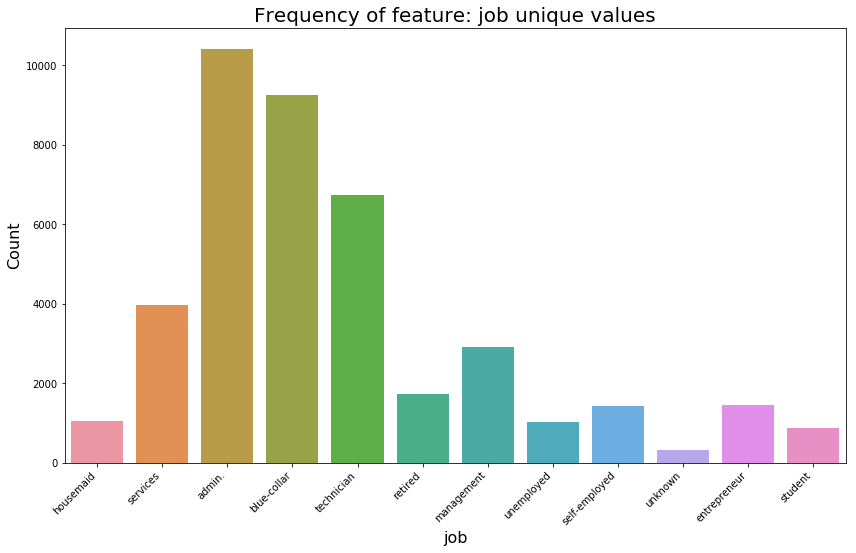

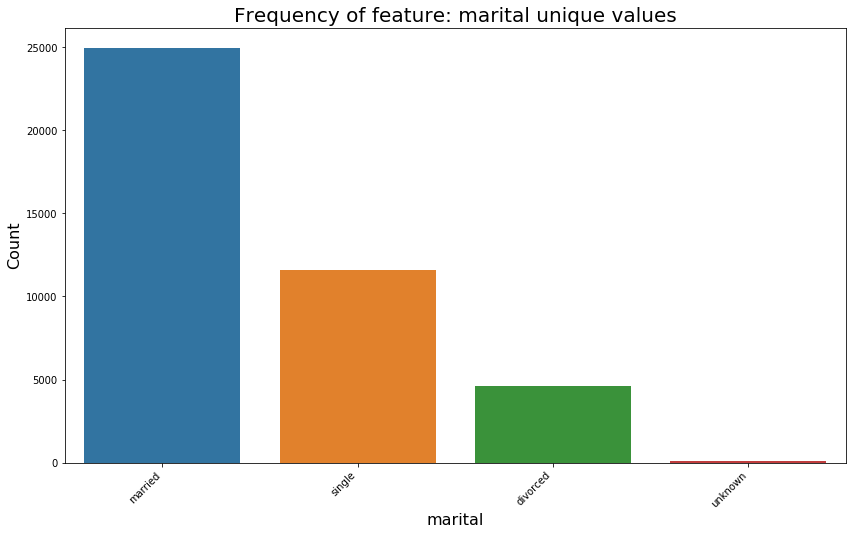

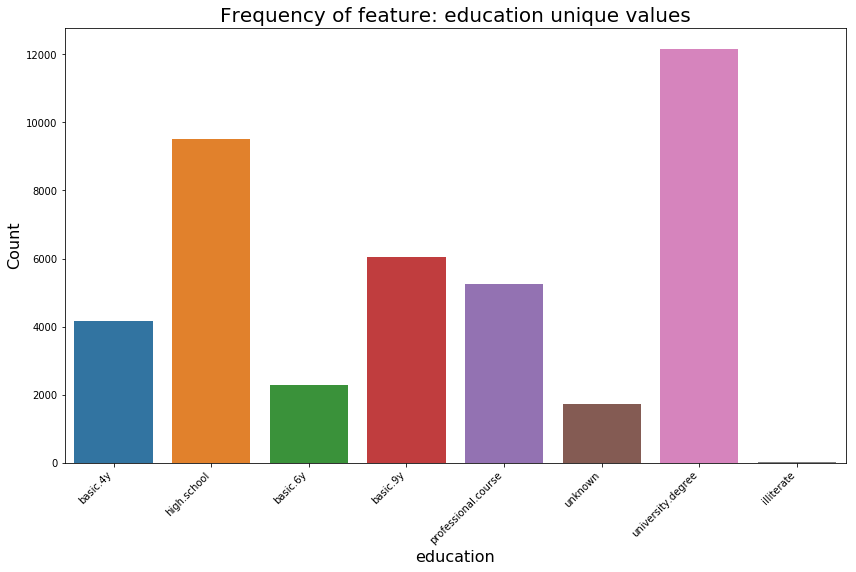

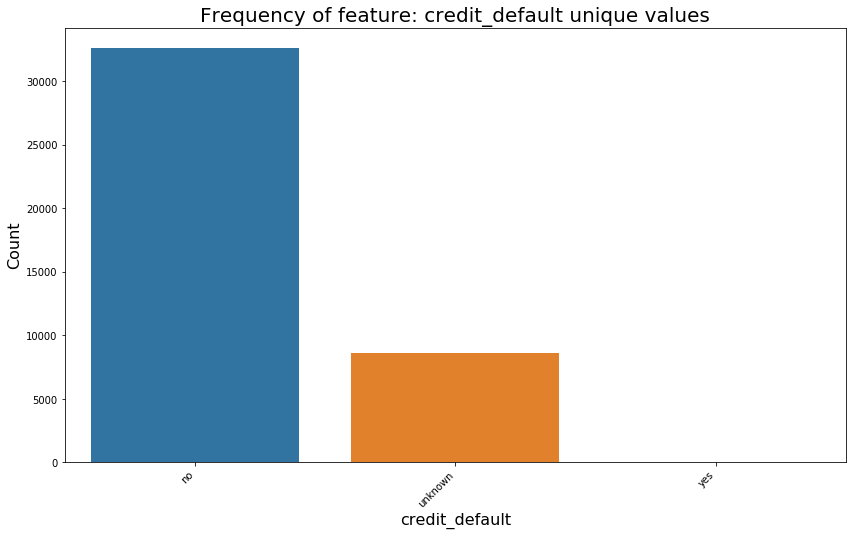

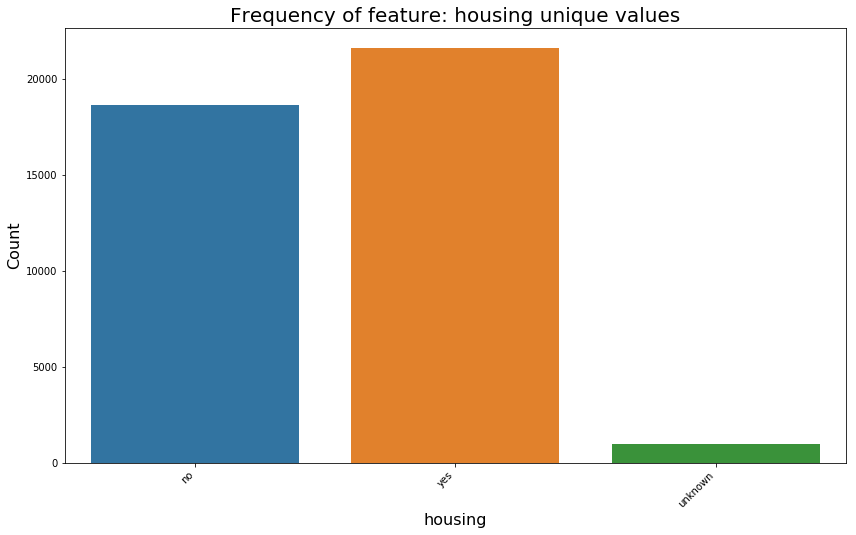

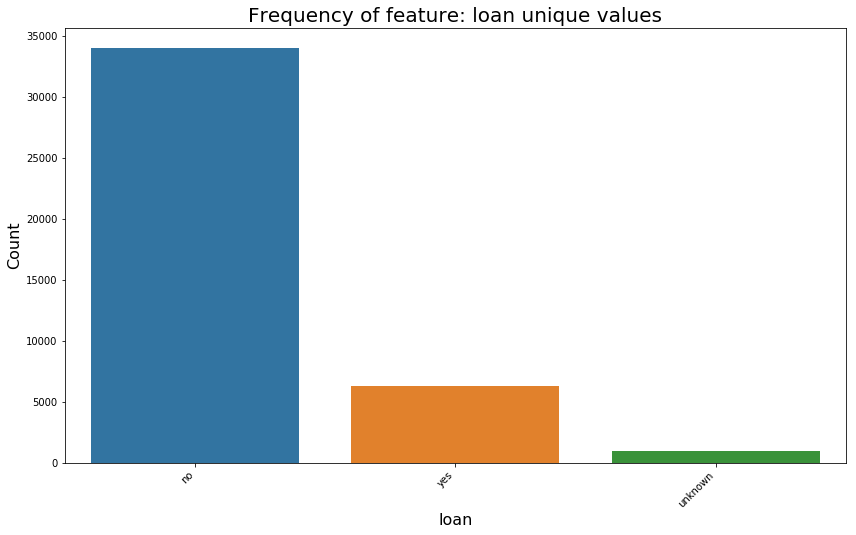

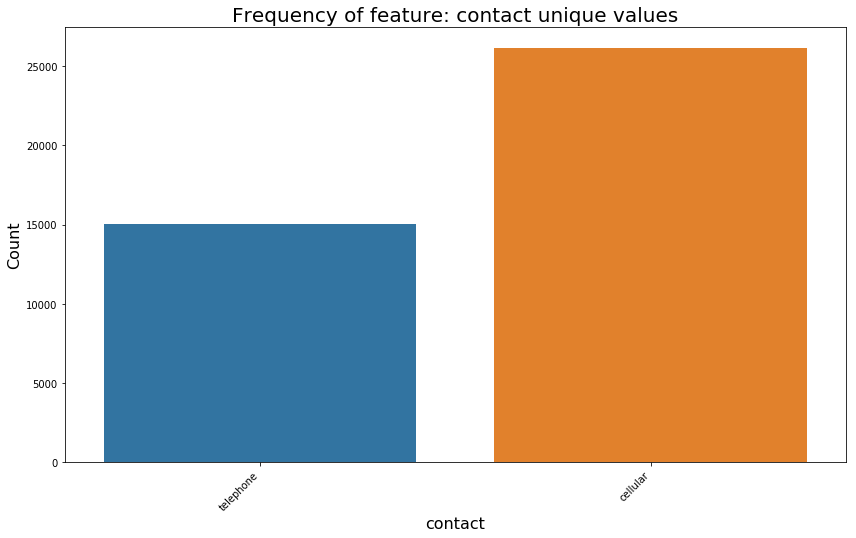

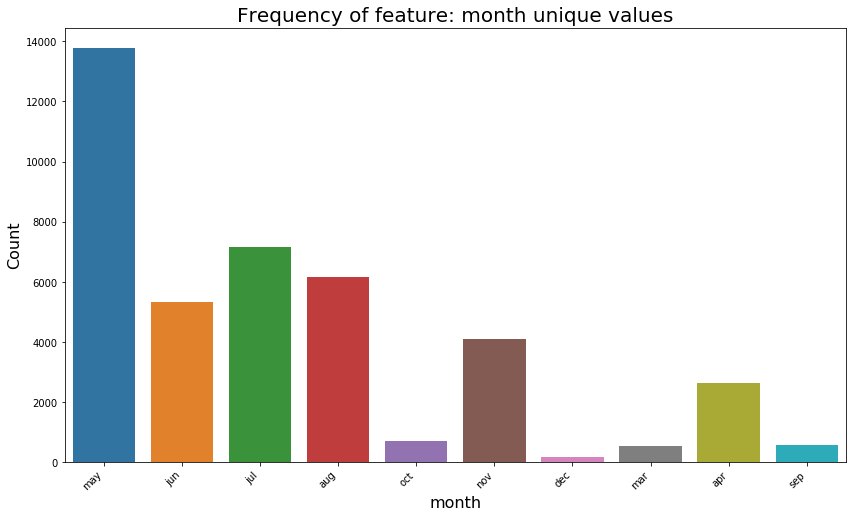

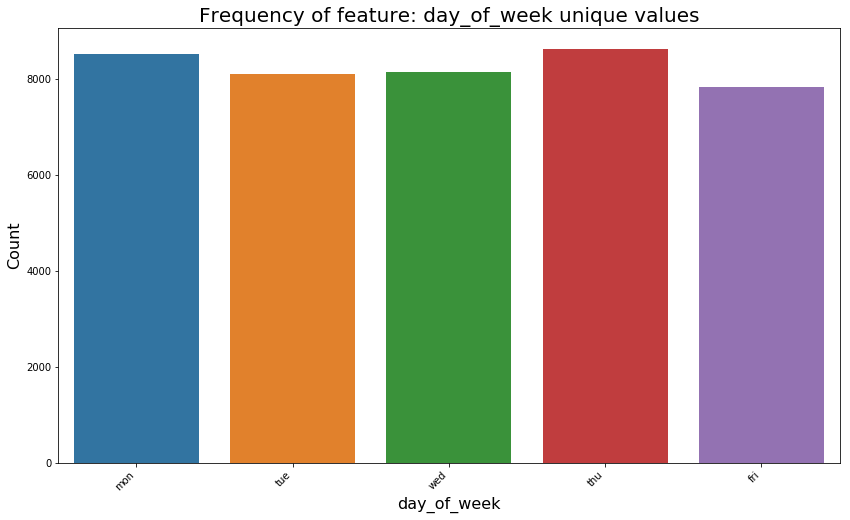

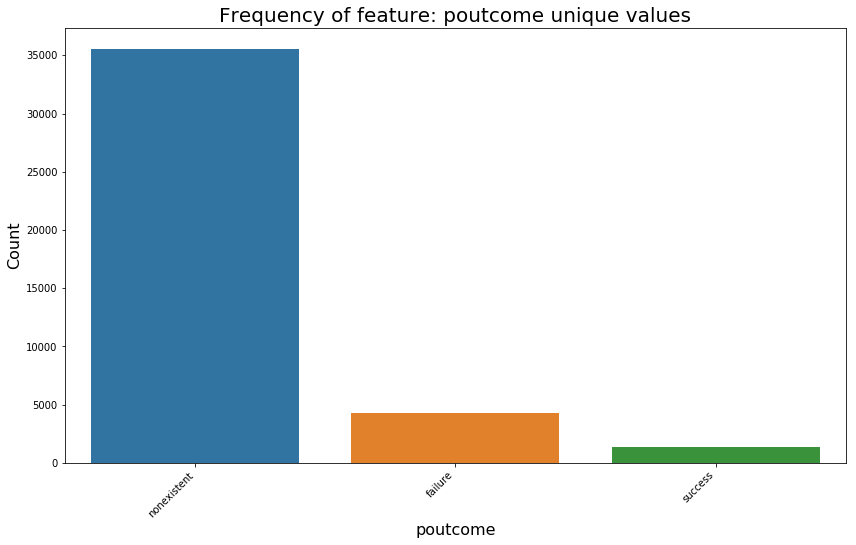

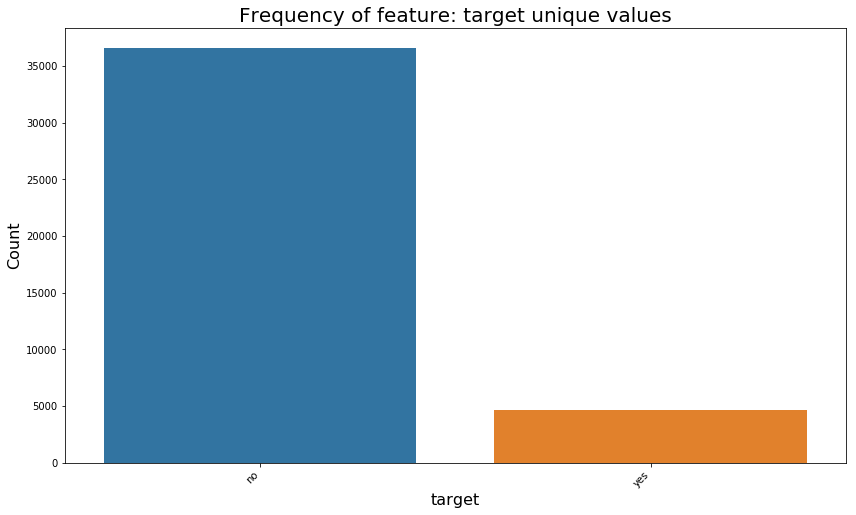

In [10]:
# plotting frequency of unique values for categorical features
for col in data_object:
    p = plt.figure(figsize=(14,8))
    p = sns.countplot(data[col])
    plt.xticks(rotation=45, ha='right')
    plt.title('Frequency of feature: '+col+' unique values', fontsize=20)
    plt.ylabel('Count', fontsize=16)
    plt.xlabel(col, fontsize=16)
    plt.show(p)

#### Some things to comment:
- All values seem valid
- Some features have intances  == to unknown. Kind of useless.
- ~10% of the target is positive class ('yes, will change it to 1). This clearly shows the dataset is quite unbalanced. 

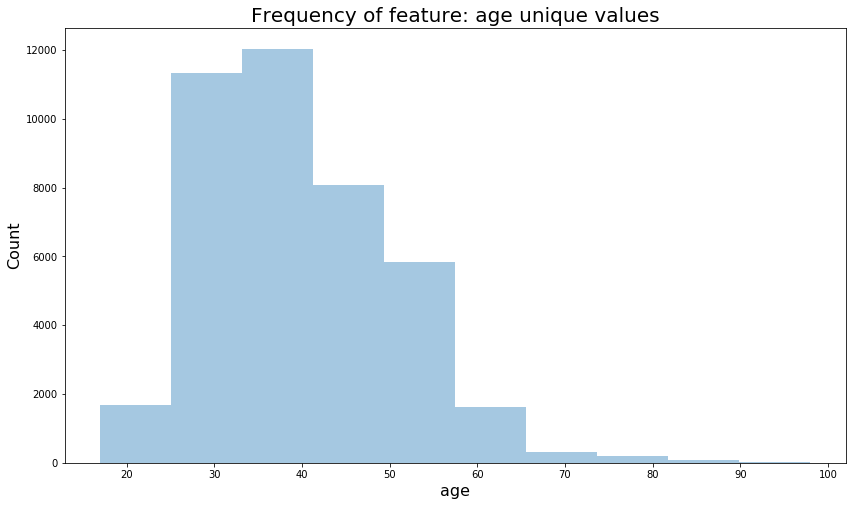

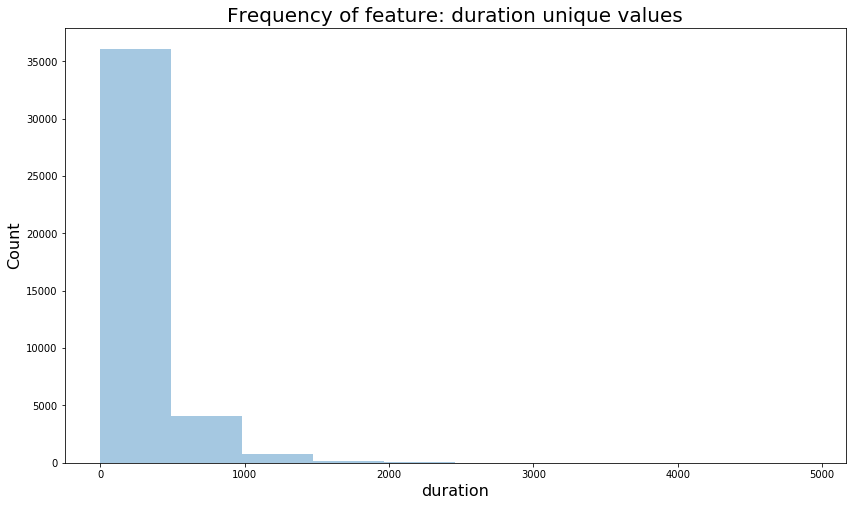

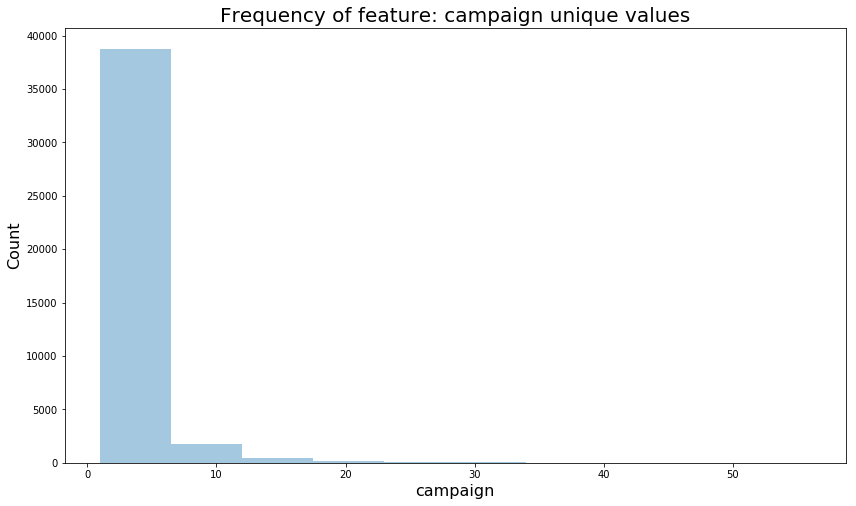

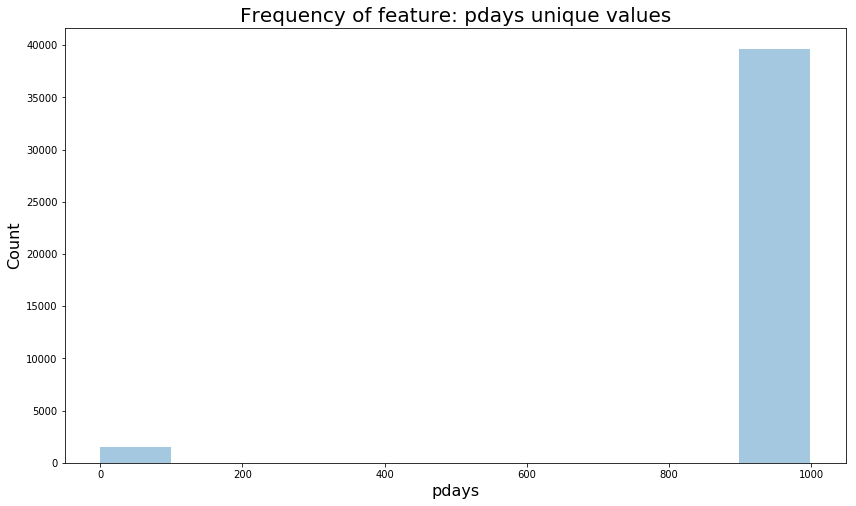

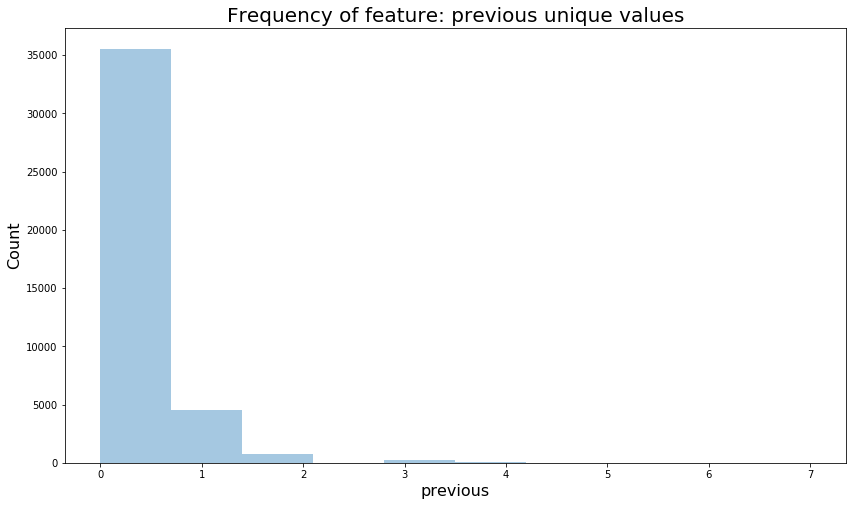

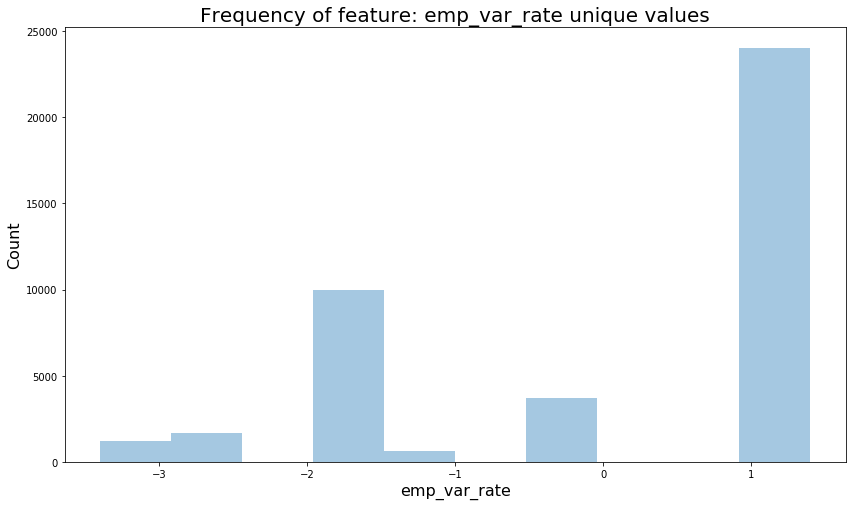

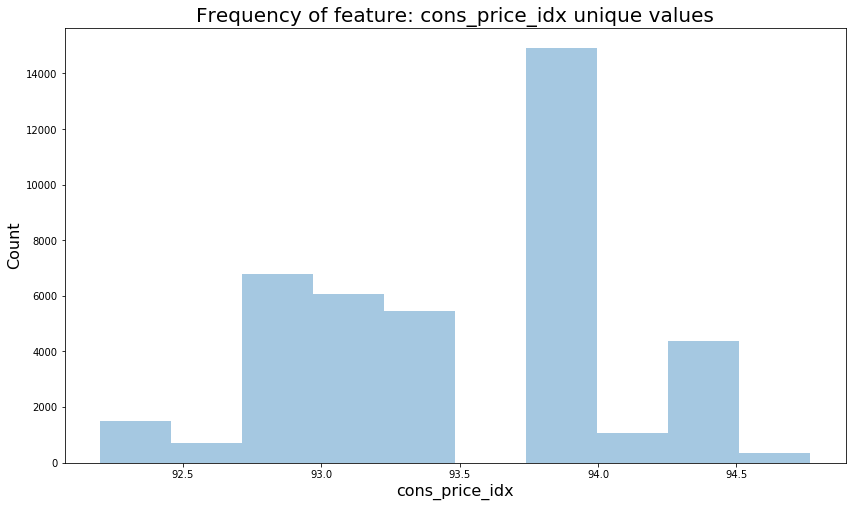

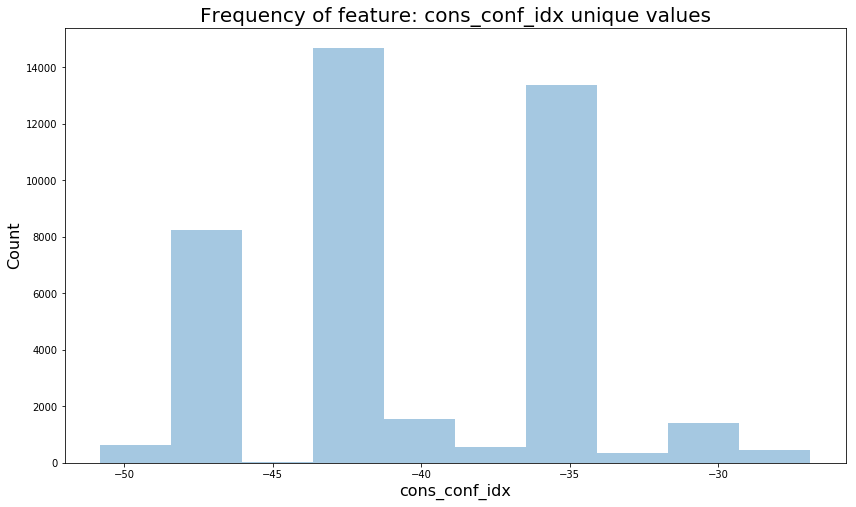

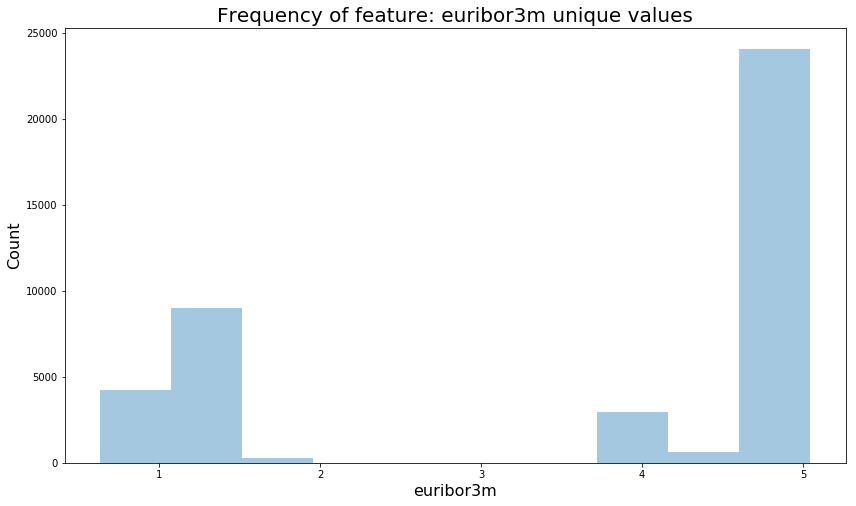

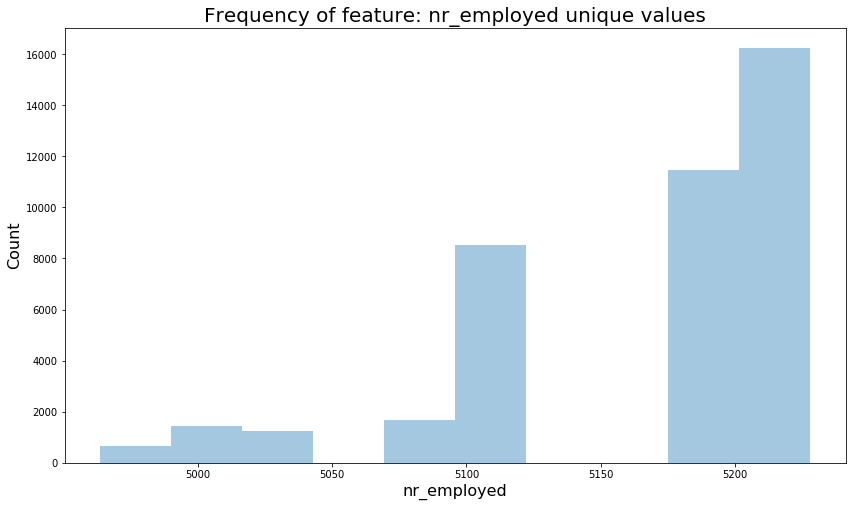

In [11]:
# Lets plot the distribution of numeric features
for col in data_numeric:
    p = plt.figure(figsize=(14,8))
    p = sns.distplot(data[col], bins=10, kde=False)
    plt.title('Frequency of feature: '+col+' unique values', fontsize=20)
    plt.xlabel(col, fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.show(p)

#### Distribution of numeric feature values seem normal. no crazy outliers to fix or keep an eye on.

In [12]:
# change target to 0 ('no', negative), 1 ('yes', positive)
data.target = [0 if x == 'no' else 1 for x in data.target]

In [13]:
data.target.unique()

array([0, 1], dtype=int64)

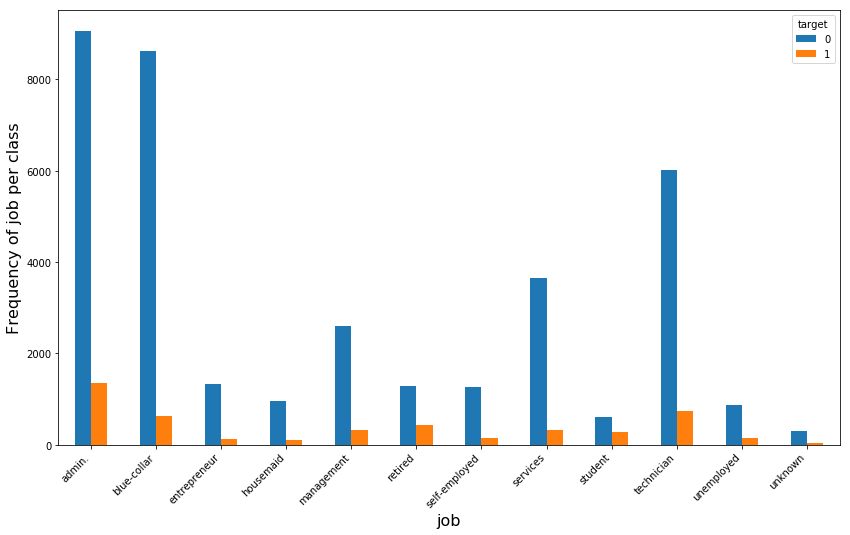

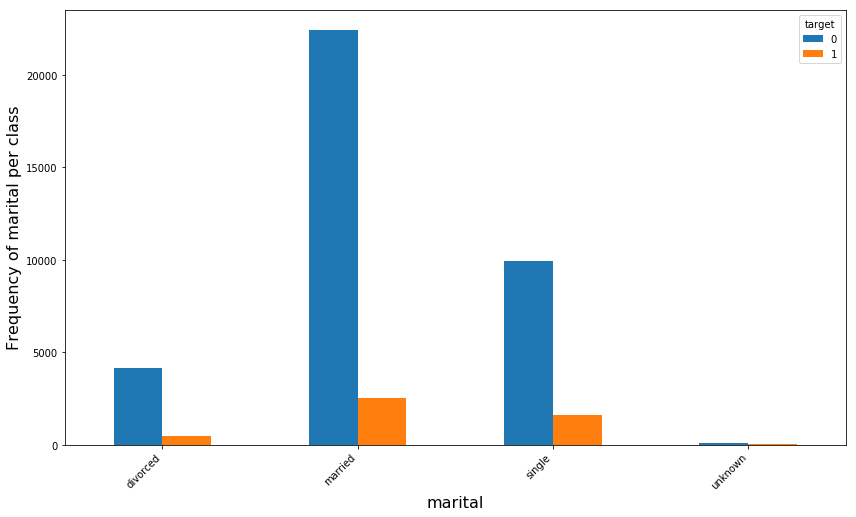

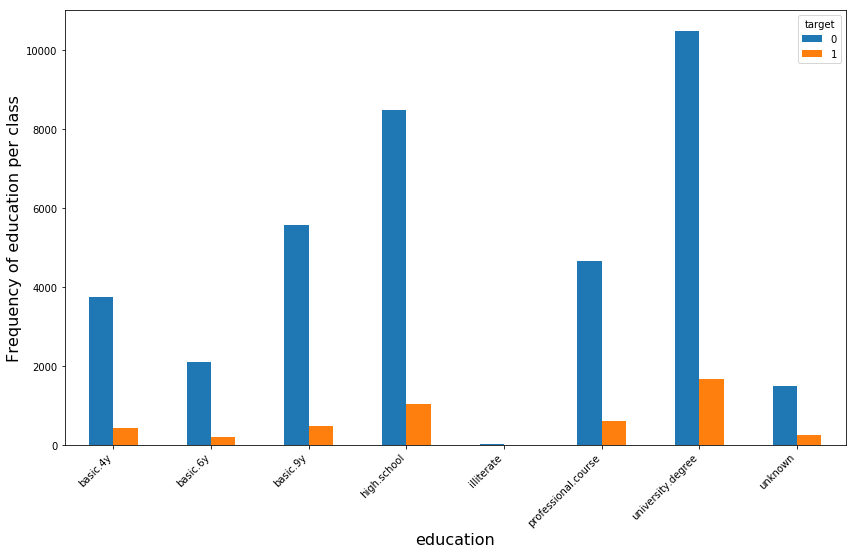

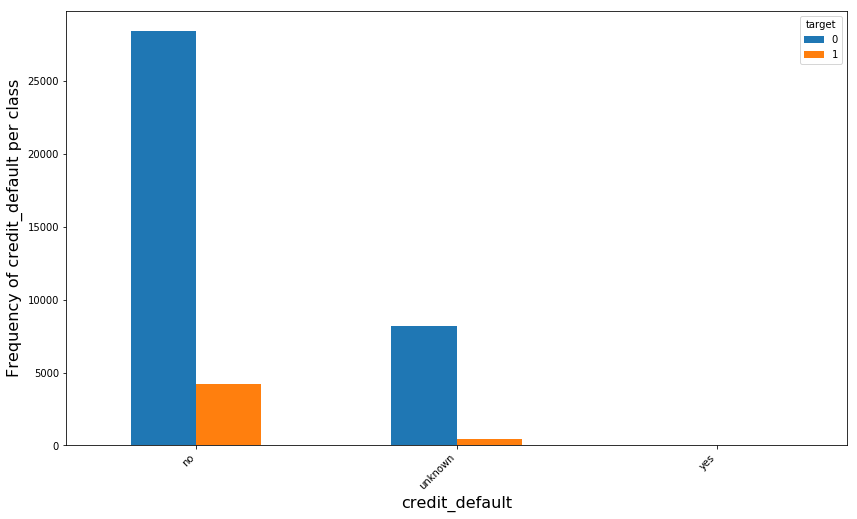

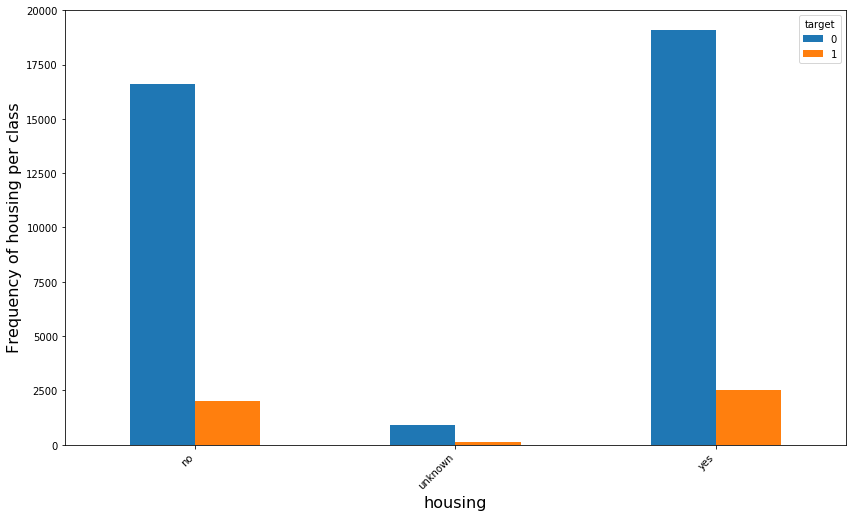

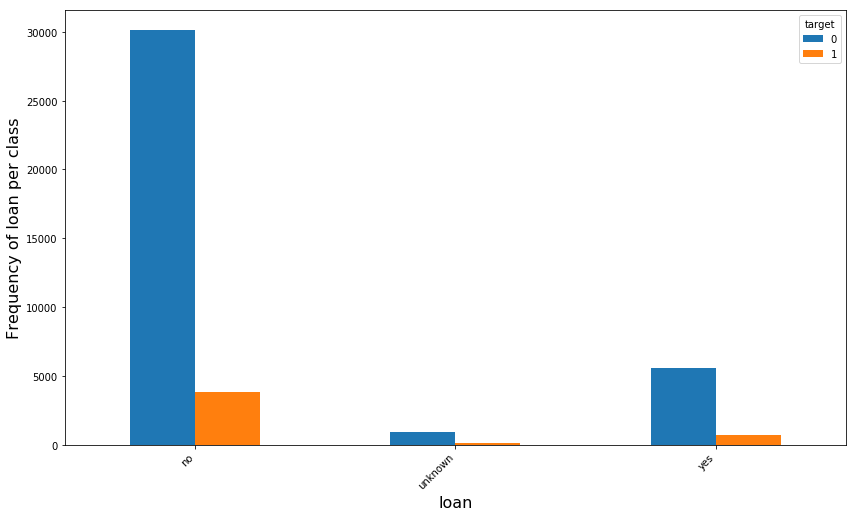

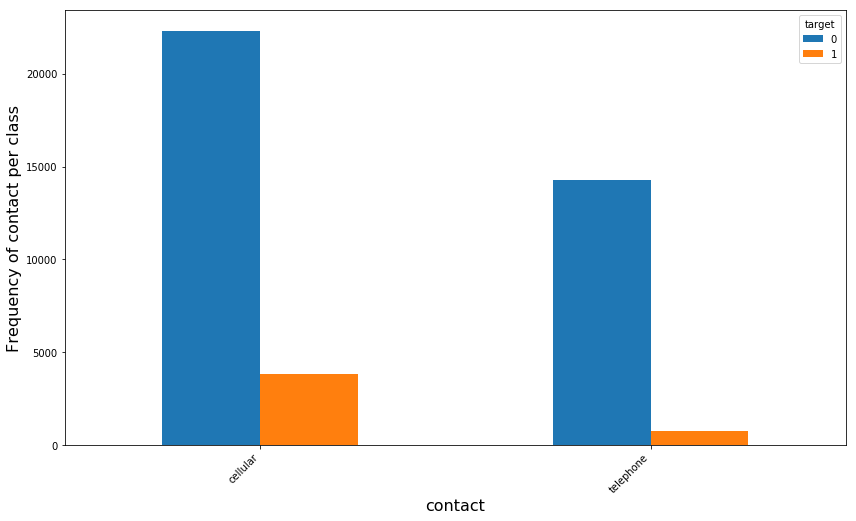

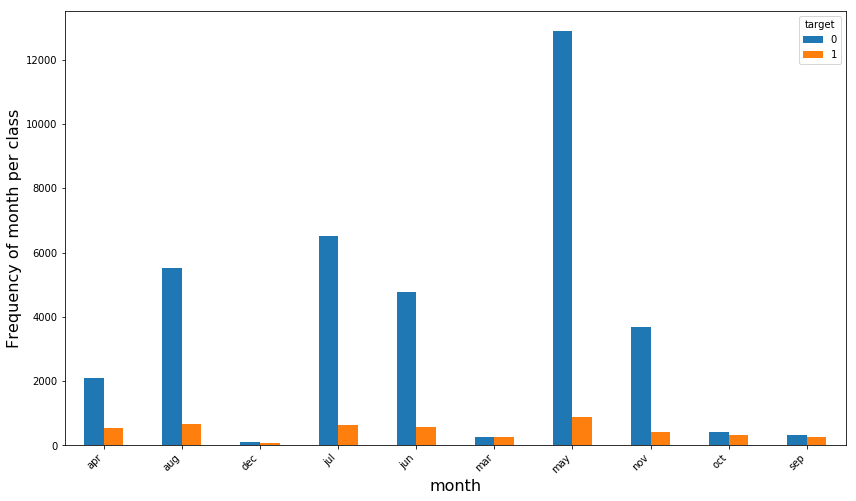

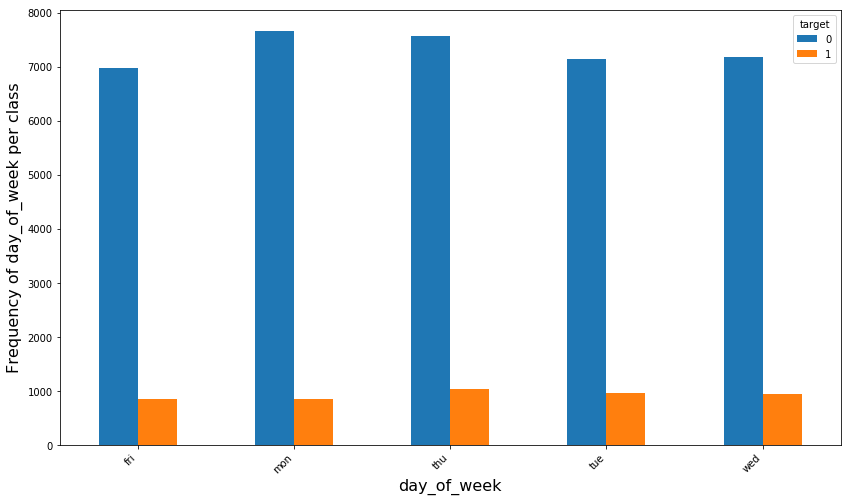

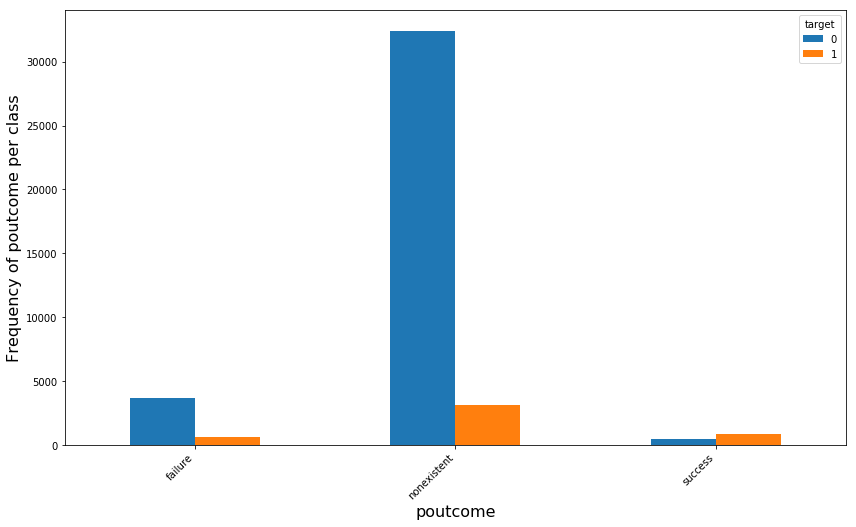

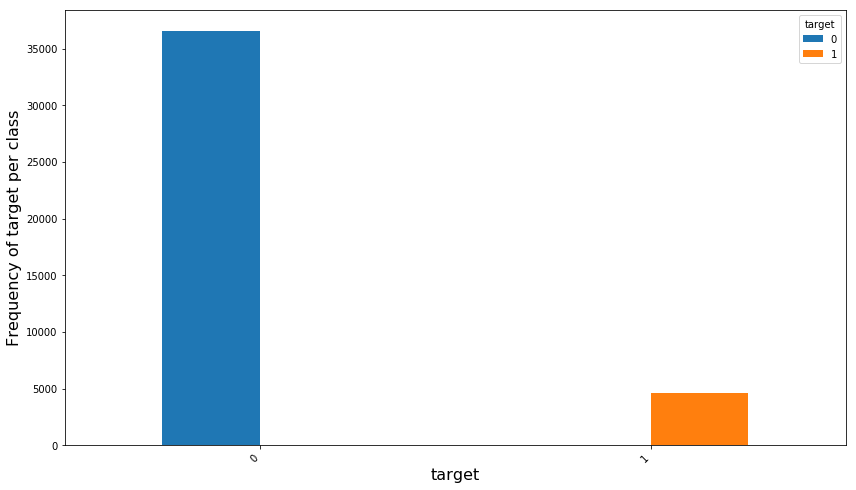

In [14]:
# Plotting categorical features grouped by target
for x in object_type:
    p = data.groupby([x, 'target'])['target'].count().unstack().plot(kind='bar', figsize=(14,8))
    plt.ylabel('Frequency of '+x+' per class', fontsize=16)
    plt.xlabel(x, fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.show(p)

#### Some things to comment:
- number of subscriber for per day of call is similar
- Number of calls is higher far on May, that doesn't seem to reflect an increase in subscribers (ration). On the other hand, March, September, October, and December the number of subscribers is similar to not (there is a higher ratio of subscriber per calls). Maybe we should increase calls those months to increase subscription

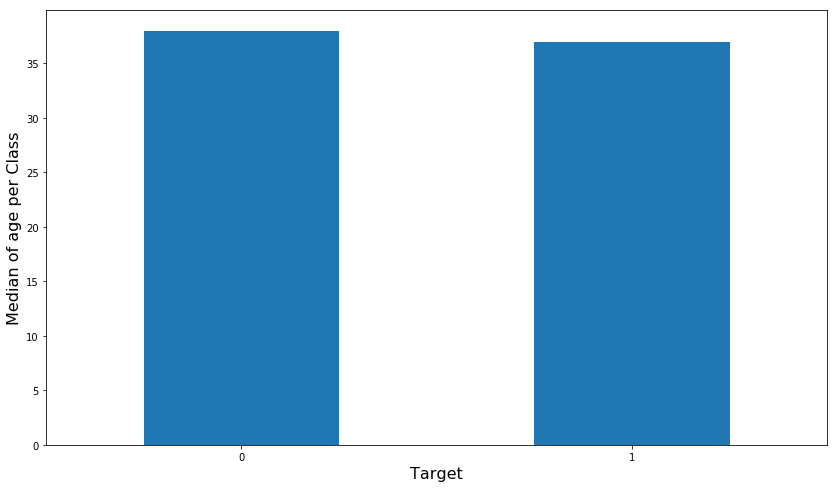

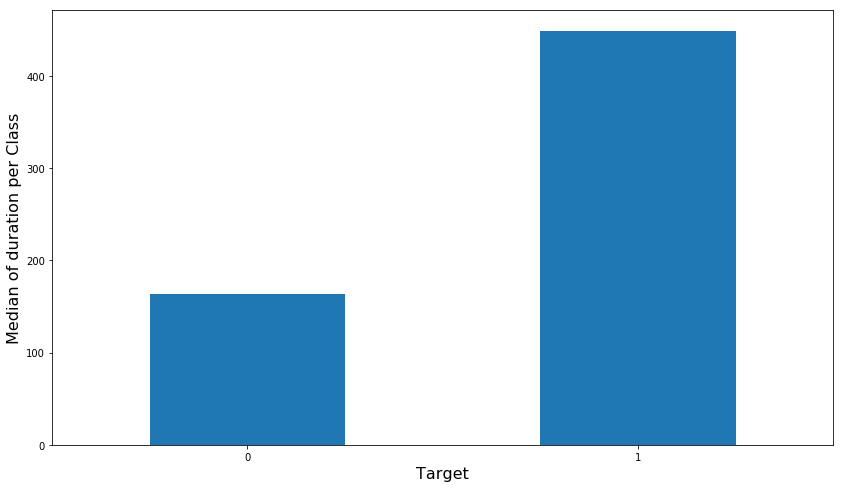

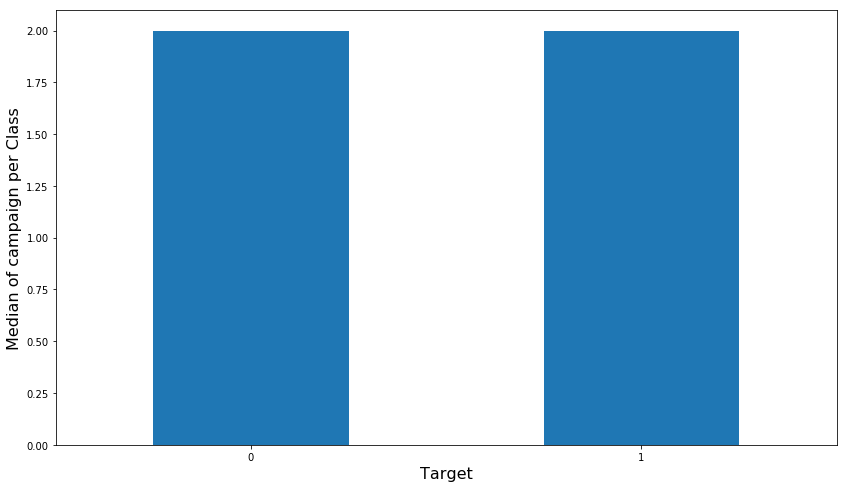

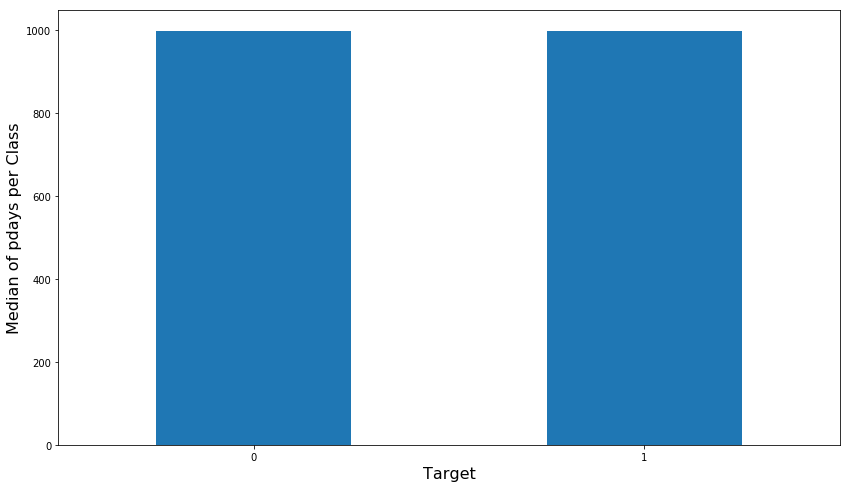

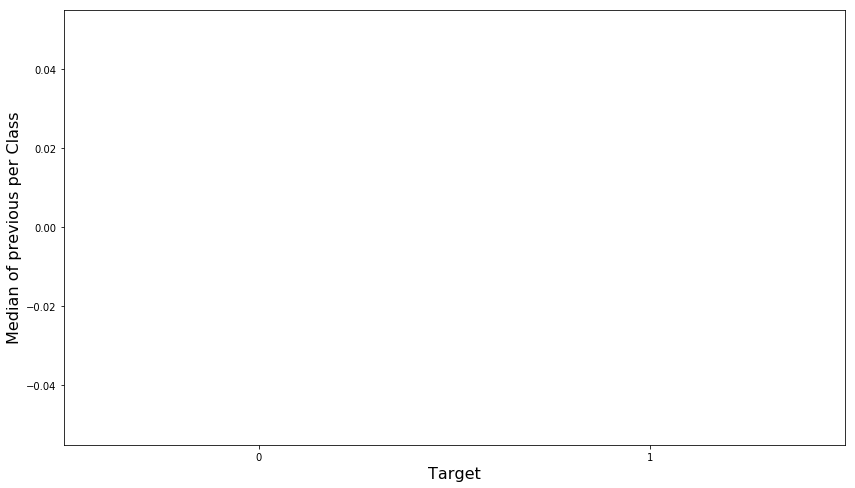

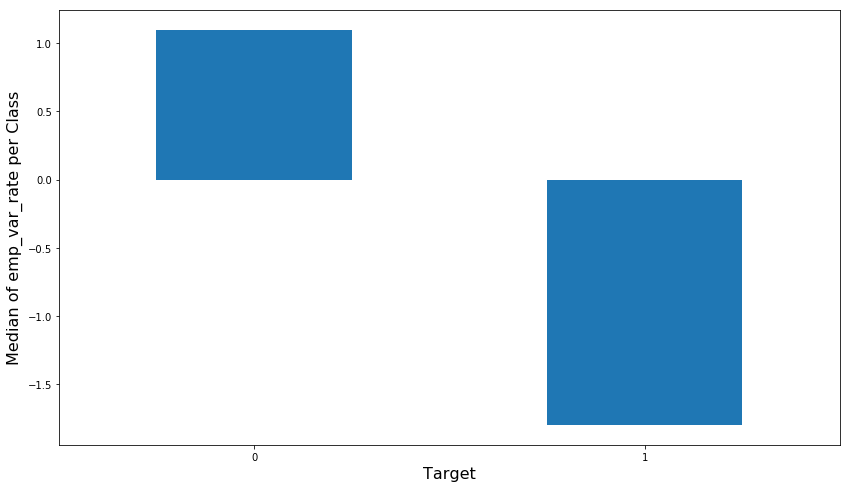

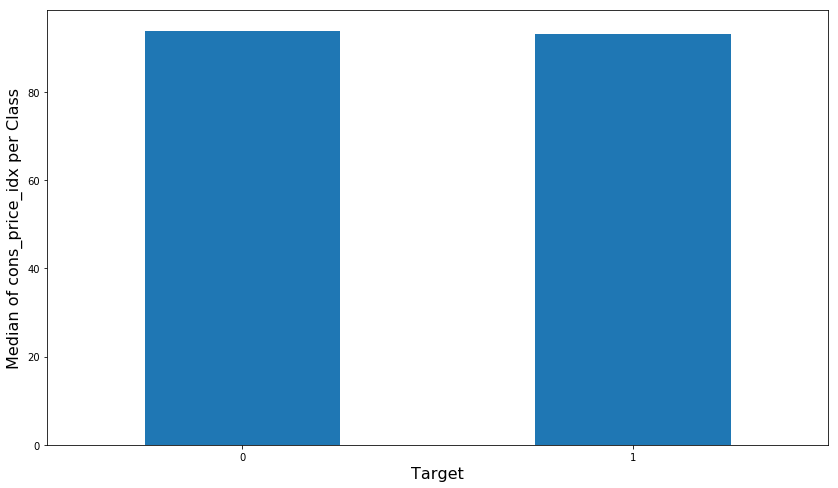

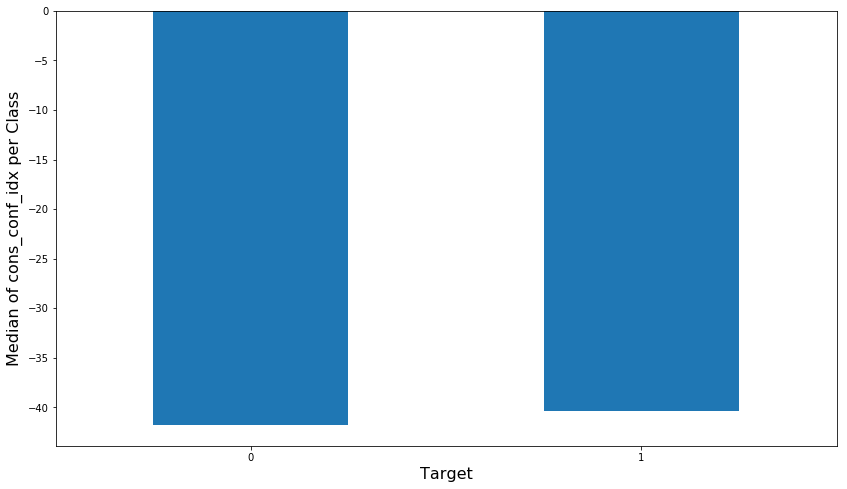

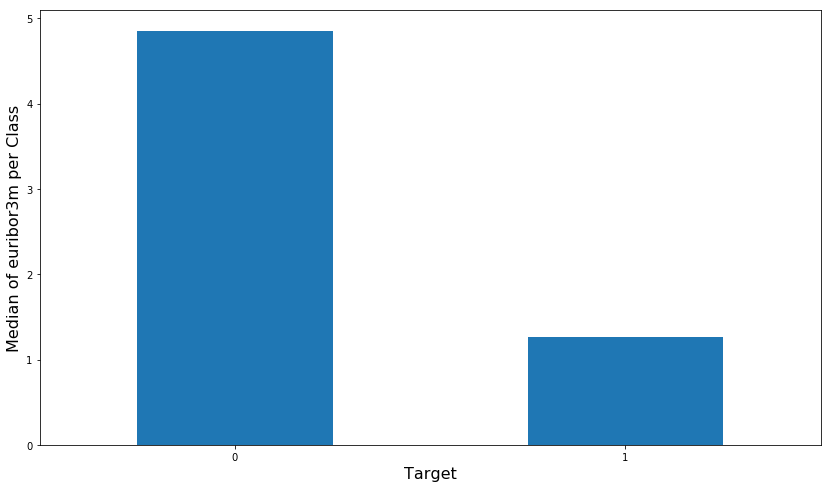

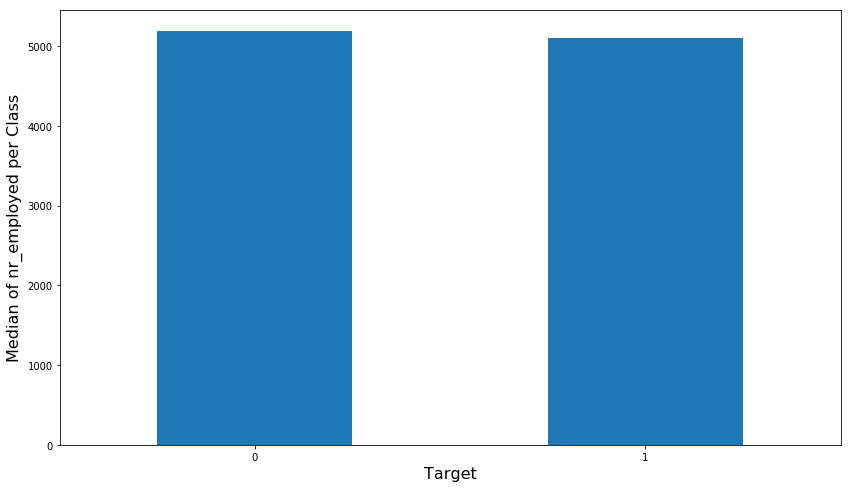

In [15]:
# Plotting the media for each numeric (continuos) feature groupby target

for x in numeric_type:
    p = data.groupby(['target'])[x].median().plot(kind='bar', figsize=(14,8))
    plt.ylabel('Median of '+x+' per Class', fontsize=16)
    plt.xlabel('Target', fontsize=16)
    plt.xticks(rotation='horizontal')
    plt.show(p)

#### These plots show that the median for features 'emp_var_rate' and 'duration' are very different between class 0 and 1. This suggests that those features may be useful for classifying the classes.

In [16]:
data_0 = data[data.target==0] # df for target == 0 only class
data_1 = data[data.target==1] # df for target == 1 only class

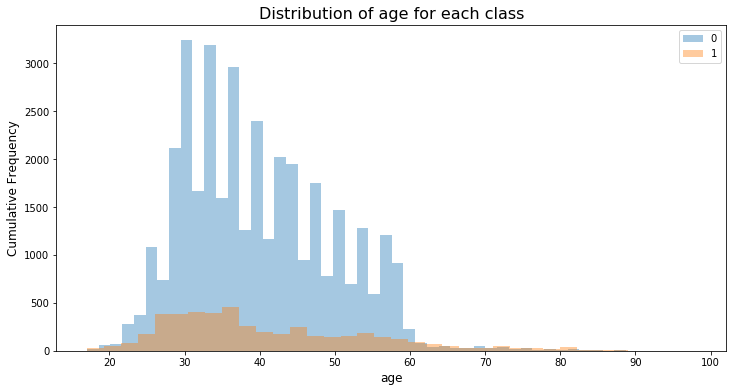

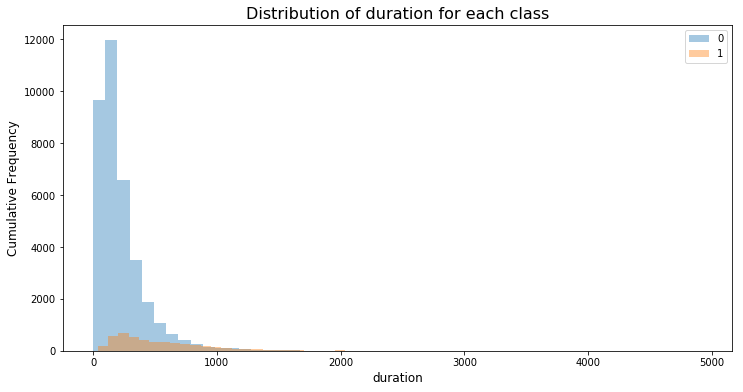

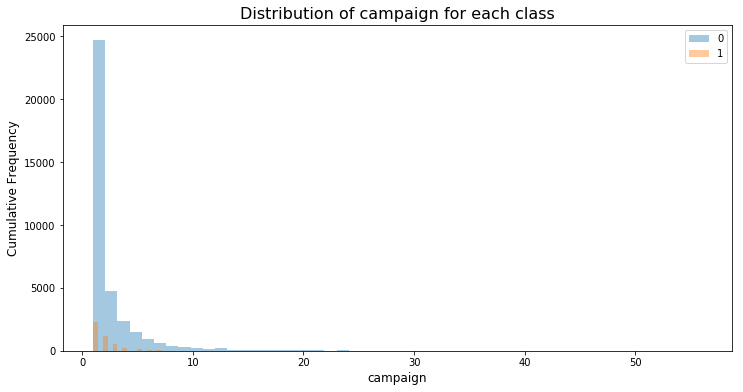

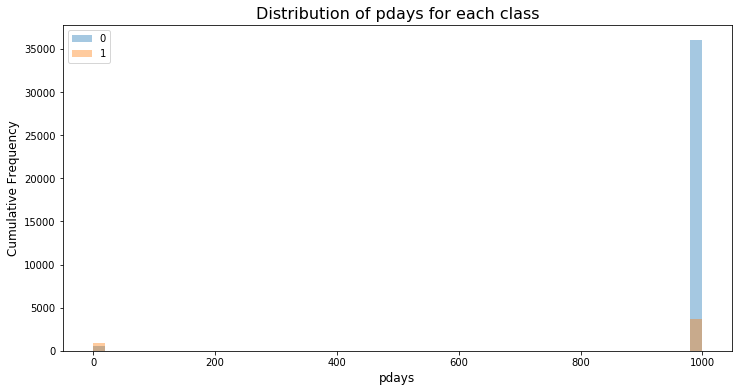

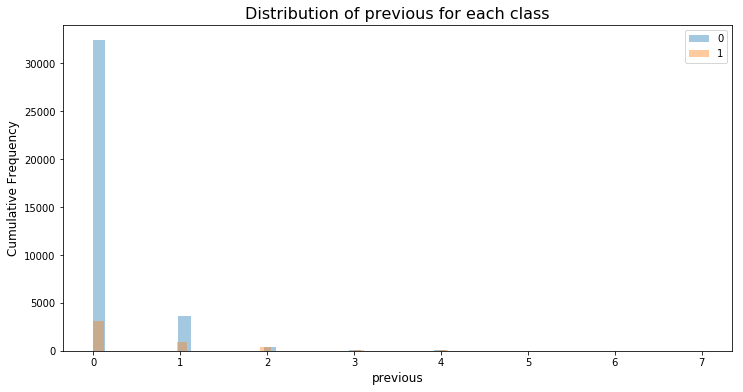

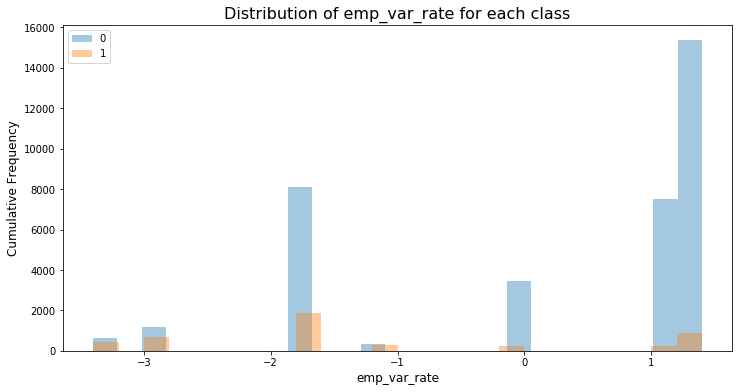

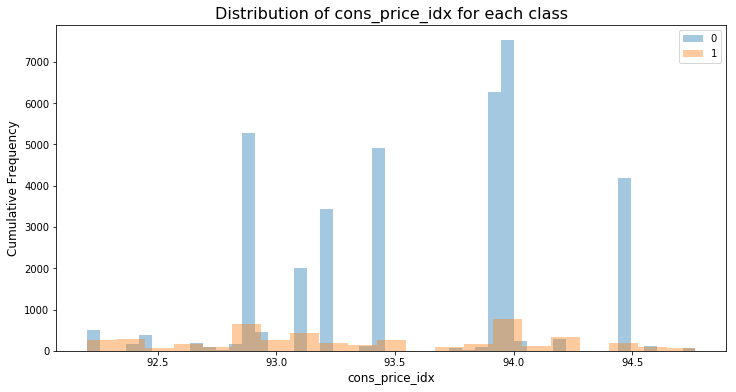

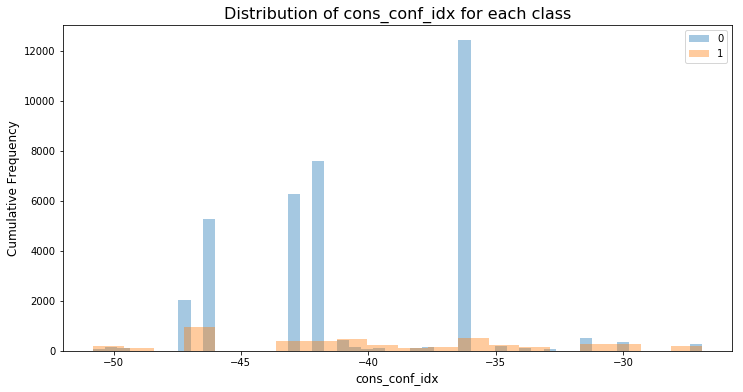

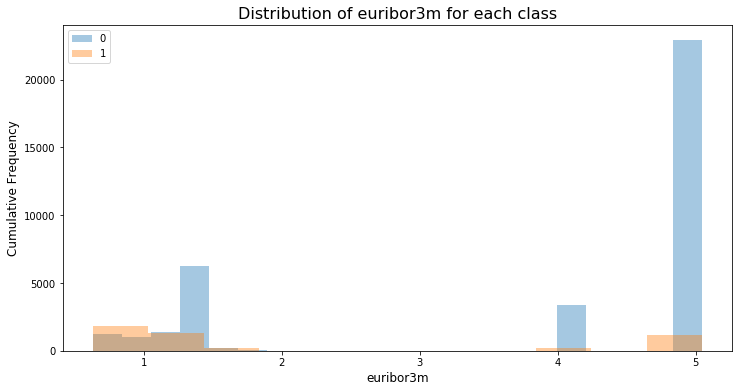

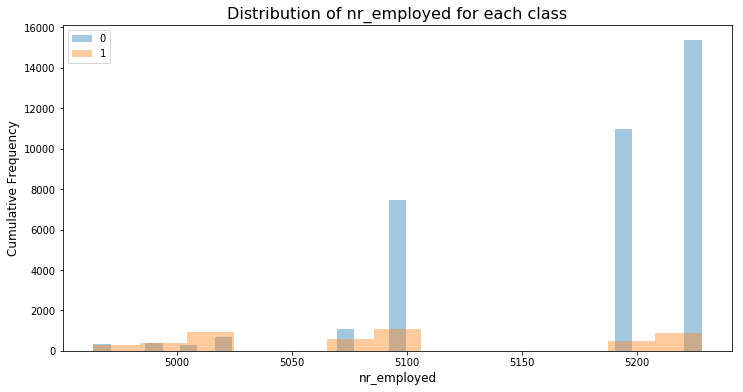

In [17]:
# Plot the distribution of numeric features for each class
def bar_plot(col):
    
    for x in col: # Column iterator
        
        p=plt.figure(figsize=(12,6))

        p=sns.distplot(data_0[x], kde=False)
        p=sns.distplot(data_1[x], kde=False)
        plt.legend(labels=[0,1])
        plt.ylabel('Cumulative Frequency', fontsize=12)
        plt.xlabel(x, fontsize=12)
        plt.title('Distribution of '+x+' for each class', fontsize=16)
        plt.show(p)

        
bar_plot(numeric_type)

#### Distribution of values for subscribers vs non-subscribers for a given feature is similar. cons_price_idx, cons_conf_idx, and nr_employed have the most different distributions. Maybe they can be useful for separating classes.

#### Working with imbalance classes is a challenge. My first approach is to use Random Forest since it is robust to imbalance classes.
#### Also, I will use precision and recal as metrics and optimize for recall, since I want to be able to detect all individuals who would potentially subscribe.

In [18]:
X = data.drop('target', axis=1)
y = data.target
X.head()

,age,job,marital,education,credit_default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [19]:
# Hot encode the categorical features.
X_encoded = pd.get_dummies(X, columns=['job', 'marital', 'education', 'credit_default', 'housing',
                                       'loan', 'contact', 'month', 'day_of_week', 'poutcome'])
X_encoded.shape

(41188, 63)

In [20]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, shuffle=False, stratify=None)
# stratify = None make stratify split

In [93]:
# Randomized Search for the best hyperparameters for RF

forest_param_grid = {
    'n_estimators':[10, 100, 1000], 
    'max_features':[2, 4, 8, 16, 32, 63],
    'min_samples_split': [3, 5, 10, 20], 
    'max_depth': [3, 5, 15, 25]
}

scorers = {
    'precision_score': metrics.make_scorer(metrics.precision_score),
    'recall_score': metrics.make_scorer(metrics.recall_score),
    'f1_score': metrics.make_scorer(metrics.f1_score)
}

def random_search_wrapper(refit_score='precision_score'):
    """
    fits a Randomized Search CV classifier using refit_score for optimization
    prints classifier performance metrics
    
    
    """
    forest_clf = RandomForestClassifier()
    skf = StratifiedKFold(n_splits=5)
    random_search = RandomizedSearchCV(forest_clf, param_distributions=forest_param_grid, scoring=scorers,
                               refit=refit_score, cv=skf, return_train_score=True, n_jobs=-1)
    random_search.fit(X_train, y_train)

    # make the predictions
    y_pred = random_search.predict(X_test)

    print('Best params for {}'.format(refit_score))
    print(random_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return random_search

random_search_clf=random_search_wrapper(refit_score='recall_score')

Best params for recall_score
{'n_estimators': 10, 'min_samples_split': 3, 'max_features': 63, 'max_depth': 25}

Confusion matrix of Random Forest optimized for recall_score on the test data:
     pred_neg  pred_pos
neg      5275       423
pos      1898       642


In [ ]:
results = pd.DataFrame(random_search_clf.cv_results_)
results = results.sort_values(by='mean_test_f1_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_f1_score','param_n_estimators']].round(3).head()

,mean_test_precision_score,mean_test_recall_score,mean_test_f1_score,param_n_estimators
0,0.645,0.546,0.591,1000
3,0.639,0.545,0.588,1000
9,0.641,0.540,0.586,100
1,0.655,0.518,0.578,1000
7,0.623,0.534,0.575,10


#### That's some horrible performance. This is probably caused by the high imbalance in classes.
#### Instead of keep trying with other algos that are robust to imbalance classes, lets balance the classes and retrain the model.
- I'll downsample the majority class, the negative (0)

In [21]:
# DataFrame with encoded feature + target
data_dummies = pd.concat([X_encoded, y], axis=1)
data_dummies.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,target
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
numeric_type.remove('target')
numeric_type

In [23]:
numeric_type

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed']

In [24]:
scaler = StandardScaler()
scaled_down_df = scaler.fit_transform(data_dummies[numeric_type])

C:\Users\Jason Sosa\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Jason Sosa\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [25]:
data_dummies.drop(numeric_type, axis=1, inplace=True)
data_dummies.shape

(41188, 54)

In [26]:
scaled_df = pd.DataFrame(data = scaled_down_df, columns=numeric_type)
scaled_df.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168


In [27]:
data_dummies_scaled = pd.concat([scaled_df, data_dummies], axis=1)
data_dummies_scaled.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,target
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,1,0,0,0,0,1,0,0
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,1,0,0,0,0,1,0,0
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,1,0,0,0,0,1,0,0
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,1,0,0,0,0,1,0,0
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,0,0,1,0,0,0,0,1,0,0


In [28]:
data_dummies_scaled_0 = data_dummies_scaled[data_dummies_scaled.target == 0] # negative class only
data_dummies_scaled_1 = data_dummies_scaled[data_dummies_scaled.target == 1] # positive class only

In [29]:
data_dummies_scaled_0.shape

(36548, 64)

In [30]:
data_dummies_scaled_1.shape

(4640, 64)

In [31]:
data_0_downsampled = resample(data_dummies_scaled_0,
                              replace=False,      # sample without replacement
                              n_samples=4640,     # to match minority class
                              random_state=42)    # reproducible results

In [32]:
data_0_downsampled.shape

(4640, 64)

In [33]:
# New downsampled DataFrame

downsampled_data = pd.concat([data_0_downsampled, data_dummies_scaled_1])
downsampled_data.target.value_counts()

1    4640
0    4640
Name: target, dtype: int64

In [34]:
X_encoded_downsampled = downsampled_data.drop('target', axis=1)
y_downsampled = downsampled_data.target

In [35]:
X_train_down, X_test_down, y_train_down, y_test_down = train_test_split(X_encoded_downsampled, y_downsampled, test_size=0.2, random_state=42)

#### Since the classes are now balanced, instead of using more complex algos that have low interpretability lets use a logistic regression.

In [122]:
# GridSearch for logistic Clf
logit_param_grid = {
    'C':[0.0001, 0.001, 0.01, 0.1, 1, 10],
    'penalty':['l1', 'l2']
}

# Use GridSearch to find the best parameters.
logit_clf = LogisticRegression(solver='liblinear')

scorers = {
    'precision_score': metrics.make_scorer(metrics.precision_score),
    'recall_score': metrics.make_scorer(metrics.recall_score),
    'f1_score': metrics.make_scorer(metrics.f1_score)
}

def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=5)
    grid_search = GridSearchCV(logit_clf, param_grid=logit_param_grid, scoring=scorers,
                               refit=refit_score, cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train_down, y_train_down)

    # make the predictions
    y_pred_down = grid_search.predict(X_test_down)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(metrics.confusion_matrix(y_test_down, y_pred_down),
                       columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

grid_search=grid_search_wrapper(refit_score='recall_score')

Best params for recall_score
{'C': 0.001, 'penalty': 'l1'}

Confusion matrix of Random Forest optimized for recall_score on the test data:
     pred_neg  pred_pos
neg       608       306
pos        19       923


In [123]:
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='mean_test_f1_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_f1_score', 'param_C']].round(3).head()

,mean_test_precision_score,mean_test_recall_score,mean_test_f1_score,param_C
8,0.862,0.884,0.873,1
7,0.862,0.885,0.873,0.1
9,0.862,0.884,0.873,1
10,0.862,0.884,0.872,10
6,0.861,0.885,0.872,0.1


#### I can change the decision boundary to get better recall, the metric I care the most. However, I want to see if I can start with a better classifier, without changing the boundary.
#### Lets try SVC

In [125]:
# GridSearch for SVC
svc_param_grid = {
    'C':[0.001, 0.01, 0.1, 1]
}

scorers = {
    'precision_score': metrics.make_scorer(metrics.precision_score),
    'recall_score': metrics.make_scorer(metrics.recall_score),
    'f1_score': metrics.make_scorer(metrics.f1_score)
}

def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=5)
    svc = SVC(gamma='auto')
    grid_search = GridSearchCV(svc, param_grid=svc_param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train_down, y_train_down)

    # make the predictions
    y_pred_down = grid_search.predict(X_test_down)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(metrics.confusion_matrix(y_test_down, y_pred_down),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

grid_search=grid_search_wrapper(refit_score='recall_score')

Best params for recall_score
{'C': 1}

Confusion matrix of Random Forest optimized for recall_score on the test data:
     pred_neg  pred_pos
neg       769       145
pos        71       871


In [126]:
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='mean_test_f1_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_f1_score', 'param_C']].round(3).head()

,mean_test_precision_score,mean_test_recall_score,mean_test_f1_score,param_C
3,0.850,0.922,0.884,1
2,0.849,0.898,0.873,0.1
1,0.790,0.855,0.821,0.01
0,0.000,0.000,0.000,0.001


In [127]:
# get decision function for each class
y_scores = grid_search.decision_function(X_test_down)

In [128]:
# get precision, recall, and thershold of decision
p, r, thresholds = metrics.precision_recall_curve(y_test_down, y_scores)

In [129]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(metrics.confusion_matrix(y_test_down, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve; triangle = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], 'v', c='k',
            markersize=15)

     pred_neg  pred_pos
neg       769       145
pos        72       870


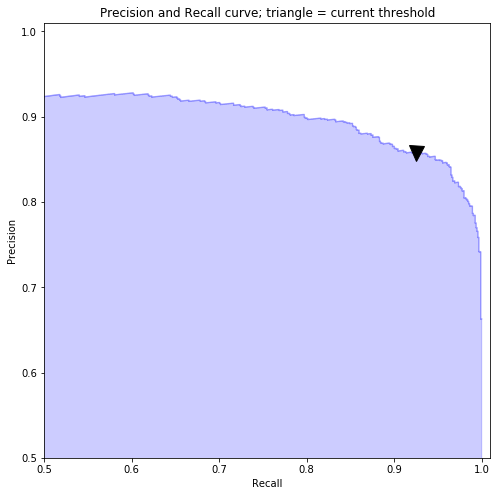

In [131]:
precision_recall_threshold(p, r, thresholds, t=0.01)

#### Modifying the threshold doesn't improve the SV classifiers. Lets try Random Forest

In [132]:
# Randomized Search for the best hyperparameters for RF

forest_param_grid = {
    'n_estimators':[10, 100, 1000], 
    'max_features':[2, 4, 8, 16, 32, 63],
    'min_samples_split': [3, 5, 10, 20], 
    'max_depth': [3, 5, 15, 25]
}

scorers = {
    'precision_score': metrics.make_scorer(metrics.precision_score),
    'recall_score': metrics.make_scorer(metrics.recall_score),
    'f1_score': metrics.make_scorer(metrics.f1_score)
}

def random_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    
    
    """
    forest_clf = RandomForestClassifier()
    skf = StratifiedKFold(n_splits=5)
    random_search = RandomizedSearchCV(forest_clf, param_distributions=forest_param_grid, scoring=scorers,
                               refit=refit_score, cv=skf, return_train_score=True, n_jobs=-1)
    random_search.fit(X_train_down, y_train_down)

    # make the predictions
    y_pred_down = random_search.predict(X_test_down)

    print('Best params for {}'.format(refit_score))
    print(random_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(metrics.confusion_matrix(y_test_down, y_pred_down),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return random_search

random_search_clf=random_search_wrapper(refit_score='recall_score')

Best params for recall_score
{'n_estimators': 1000, 'min_samples_split': 10, 'max_features': 16, 'max_depth': 15}

Confusion matrix of Random Forest optimized for recall_score on the test data:
     pred_neg  pred_pos
neg       762       152
pos        50       892


In [133]:
results = pd.DataFrame(random_search_clf.cv_results_)
results = results.sort_values(by='mean_test_f1_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_f1_score',
         'param_max_depth', 'param_max_features', 'param_min_samples_split',
         'param_n_estimators']].round(3).head(5)

,mean_test_precision_score,mean_test_recall_score,mean_test_f1_score,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators
9,0.859,0.938,0.896,15,16,10,1000
4,0.858,0.935,0.895,15,16,3,100
7,0.855,0.929,0.891,25,8,3,100
3,0.843,0.930,0.884,5,32,10,10
5,0.821,0.932,0.873,3,63,20,1000


#### Performance improved a bit. Recall = 0.938
#### Lets modify the threshold to see if we can improve recall. Of course, this will cause a decrease in recall.

In [134]:
# get prediction class probabilities
y_scores = random_search_clf.predict_proba(X_test_down)[:, 1]

In [135]:
# get precision, recall, and thershold of decision (0.5 default RF)
p, r, thresholds = metrics.precision_recall_curve(y_test_down, y_scores)

In [136]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(metrics.confusion_matrix(y_test_down, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve; triangle = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], 'v', c='k',
             markersize=15)

     pred_neg  pred_pos
neg       715       199
pos        10       932


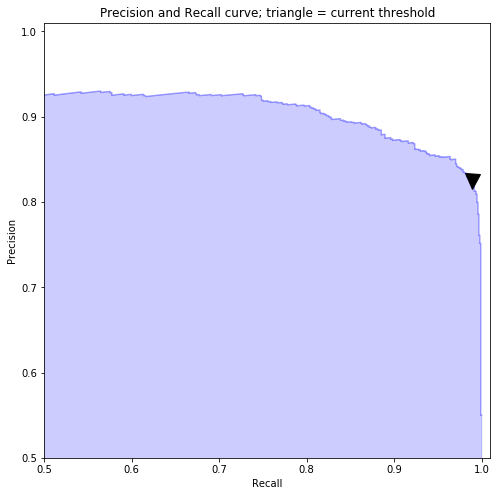

In [139]:
precision_recall_threshold(p, r, thresholds, 0.25)

#### By changing the threshold from 0.5 (defaul in RF) to 0.25, I managed to increase recall to nearly 1. This causes a decrease in precision from 0.85 to ~0.82. This is really not a substantial decrease

#### Lets find which features better predict succesful subscripton

In [44]:
# I'll use drop out column to obtain the feature importance for each of them
def dropcol_importances(rf, X_train, y_train):
    rf_ = clone(rf)
    rf_.random_state = 999
    rf_.fit(X_train, y_train)
    baseline = rf_.oob_score_
    imp = []
    for col in X_train.columns:
        X = X_train.drop(col, axis=1)
        rf_ = clone(rf)
        rf_.random_state = 999
        rf_.fit(X, y_train)
        o = rf_.oob_score_
        imp.append(baseline - o)
    imp = np.array(imp)
    I = pd.DataFrame(
            data={'Feature':X_train.columns,
                  'Importance':imp})
    I = I.set_index('Feature')
    I = I.sort_values('Importance', ascending=False)
    return I

In [69]:
rf = RandomForestClassifier(n_estimators = 1000, min_samples_split = 10, max_depth = 15, oob_score=True)

In [70]:
feat_imp = dropcol_importances(rf, X_train_down, y_train_down)

In [78]:
feat_imp = feat_imp.sort_values('Importance',ascending=False)
feat_imp.head(10)

,Importance
Feature,
duration,0.143319
contact_telephone,0.001347
job_retired,0.001078
euribor3m,0.000943
job_self-employed,0.000943
month_may,0.000808
marital_divorced,0.000404
nr_employed,0.000404
month_jun,0.000269


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

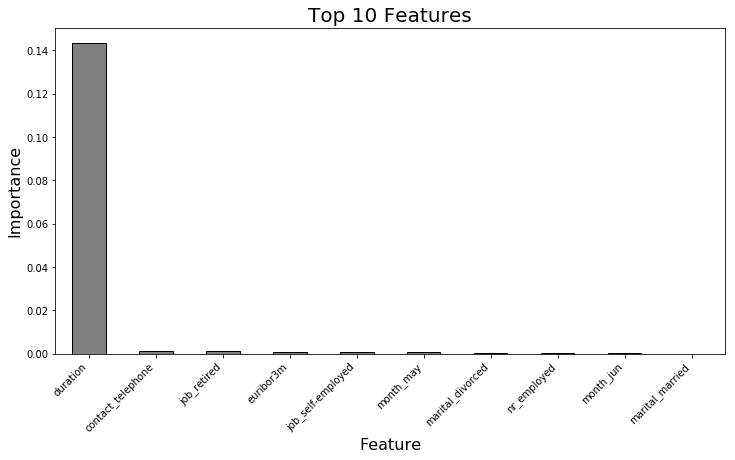

In [85]:
feat_imp.head(10).plot(kind='bar', figsize=(12,6), color='gray', edgecolor='k', legend=None)
plt.title('Top 10 Features', fontsize=20)
plt.ylabel('Importance', fontsize=16)
plt.xlabel('Feature', fontsize=16)
plt.xticks(rotation=45, ha='right')

#### Turns out duration of call is the best predictor of success. This is kind of problematic because we don't know if the succes was caused by a longer call or if the calls were long because they were gathering the person's information during signing up of the customer.
#### Therefore, it would be more useful to look at the rest of the top 10 features.
#### Contact_telephone, job_retired, and job_self_employed are interesting features, specially job_retired and job_self_employed. Maybe the bank should focus on that demografic to increase subscription.